In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
from dataload import df

In [95]:
from dataload import numeric_df

In [96]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [101]:
def clean_data(df):
    print("🧹 Remove null rows/missing values")
    m = df.shape[0]
    df.dropna(inplace=True)
    if df.shape[0] == m:
        print("✅ No null or missing values")
    print(f"Shape after removing missing values: {df.shape}")

    df = df.drop_duplicates()
    print(f"Shape after removing duplicates: {df.shape}\n")

    print("🔢 Convert meaningful object columns to numeric")
    for col in df.select_dtypes(include='object'):
        df[col] = pd.to_numeric(df[col], errors='ignore')

    df.info()
    
    numeric_df = df.select_dtypes(include=['number'])
    print("\n📊 Check for Outliers")
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    IQR = Q3 - Q1
    plt.figure(figsize=(10,6))
    plt.boxplot(numeric_df)
    plt.xticks(range(1, len(numeric_df.columns)+1), numeric_df.columns, rotation=45)
    plt.title("Boxplot of Numeric Features")
    plt.show()
    outliers_iqr = df[((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]
    print(f"Number of outlier rows: {outliers_iqr.shape[0]}")
    print(outliers_iqr.head()) 

    df_clean = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]
    numeric_df1 = df_clean.select_dtypes(include=['number'])
    plt.figure(figsize=(10,6))
    plt.boxplot(numeric_df1)
    plt.xticks(range(1, len(numeric_df.columns)+1), numeric_df.columns, rotation=45)
    plt.title("Boxplot of Numeric Features")
    plt.show()
    print(f"Removed rows: {df.shape[0] - df_clean.shape[0]}")
    print(f"Remaining rows: {df_clean.shape[0]}")

    df_clean.reset_index(drop=True, inplace=True)
    return df_clean


🧹 Remove null rows/missing values
✅ No null or missing values
Shape after removing missing values: (200, 4)
Shape after removing duplicates: (200, 4)

🔢 Convert meaningful object columns to numeric
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB

📊 Check for Outliers


C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_31048\2993399316.py:14: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


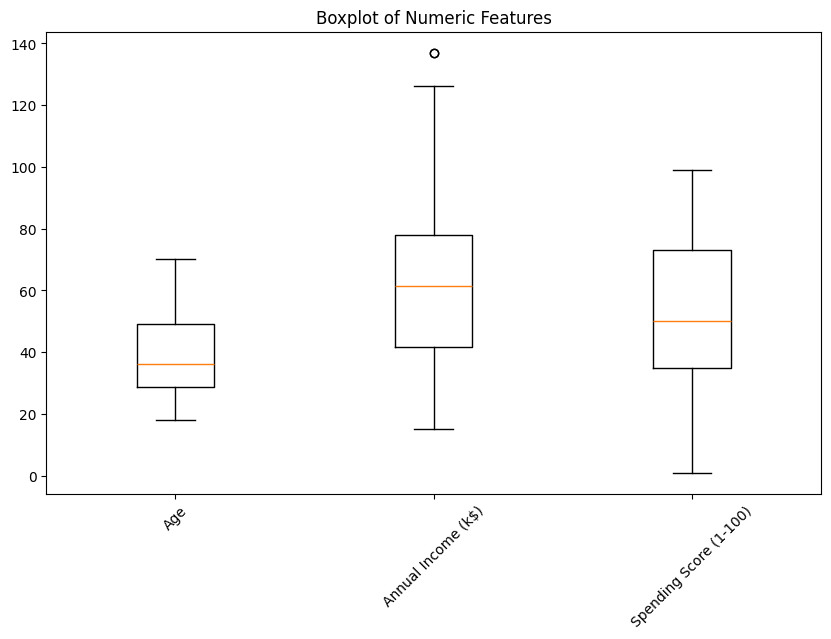

Number of outlier rows: 2
    Genre  Age  Annual Income (k$)  Spending Score (1-100)
198  Male   32                 137                      18
199  Male   30                 137                      83


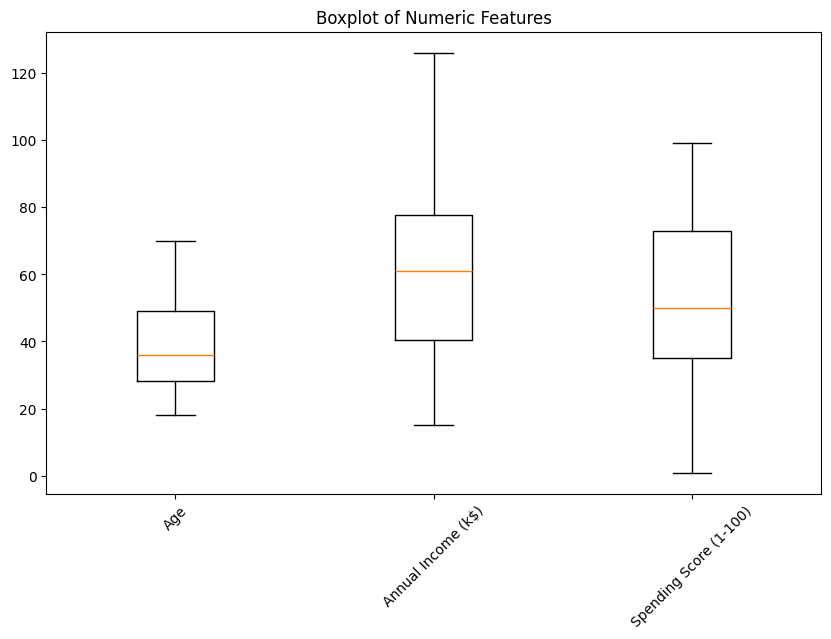

Removed rows: 2
Remaining rows: 198


In [102]:
df_clean = clean_data(df)

In [93]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   198 non-null    object
 1   Age                     198 non-null    int64 
 2   Annual Income (k$)      198 non-null    int64 
 3   Spending Score (1-100)  198 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.3+ KB
